In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
X, y = mnist.data, mnist.target

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, scoring=scoring, refit='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.942) f1: (test=0.941) precision: (test=0.942) recall: (test=0.941) total time=  23.8s
[CV 2/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.944) f1: (test=0.943) precision: (test=0.944) recall: (test=0.943) total time=  22.7s
[CV 3/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.945) f1: (test=0.944) precision: (test=0.945) recall: (test=0.944) total time=  24.0s
[CV 4/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.938) f1: (test=0.938) precision: (test=0.938) recall: (test=0.937) total time=  23.5s
[CV 5/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.945) f1: (test=0.944) precision: (test=0.945) recall: (test=0.944) total time=  22.9s
[CV 1/5] END n_neighbors=3, weights=distance; accuracy: (test=0.942) f1: (test=0.942) precision: (test=0.943) recall: (test=0.942) total time=  22.4s
[CV 2/5] END n_neighbors=3, weights=distance;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_macro',
                      'precision': 'precision_macro',
                      'recall': 'recall_macro'},
             verbose=3)

In [ ]:
knn_grid_search.best_score_

0.9465166666666667

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, scoring=scoring, refit='accuracy')
knn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.972) f1: (test=0.972) precision: (test=0.972) recall: (test=0.971) total time=  26.7s
[CV 2/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.971) f1: (test=0.970) precision: (test=0.971) recall: (test=0.970) total time=  26.6s
[CV 3/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.969) f1: (test=0.969) precision: (test=0.969) recall: (test=0.968) total time=  27.8s
[CV 4/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.969) f1: (test=0.968) precision: (test=0.969) recall: (test=0.968) total time=  26.6s
[CV 5/5] END n_neighbors=3, weights=uniform; accuracy: (test=0.970) f1: (test=0.970) precision: (test=0.971) recall: (test=0.970) total time=  26.2s
[CV 1/5] END n_neighbors=3, weights=distance; accuracy: (test=0.972) f1: (test=0.972) precision: (test=0.973) recall: (test=0.972) total time=  25.3s
[CV 2/5] END n_neighbors=3, weights=distance;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_macro',
                      'precision': 'precision_macro',
                      'recall': 'recall_macro'},
             verbose=3)

In [6]:
knn_grid_search.best_score_

0.9716166666666666

In [7]:
knn_grid_search.cv_results_

{'mean_fit_time': array([0.20468817, 0.23897657, 0.20491605, 0.2036592 , 0.20686221,
        0.20689254]),
 'std_fit_time': array([0.00375526, 0.06778573, 0.00250221, 0.00232606, 0.00385983,
        0.00472461]),
 'mean_score_time': array([26.58388143, 26.96242185, 27.17606945, 26.90055618, 27.39501681,
        26.66016579]),
 'std_score_time': array([0.5387996 , 2.02552285, 0.26371591, 0.54465409, 0.18474858,
        0.25721508]),
 'param_n_neighbors': masked_array(data=[3, 3, 4, 4, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neighbors': 3, 'weights': 'distance'},
  {'n_neighbors': 4, 'weights': 'uniform'},
  {'n_neighbors': 4, 'weight

In [9]:
best_index = knn_grid_search.cv_results_['rank_test_f1'].argmin()

best_f1_score = knn_grid_search.cv_results_['mean_test_f1'][best_index]

best_f1_score

0.9714297346103606

In [8]:
knn_grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [13]:
from sklearn.metrics import accuracy_score

y_pred = knn_grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

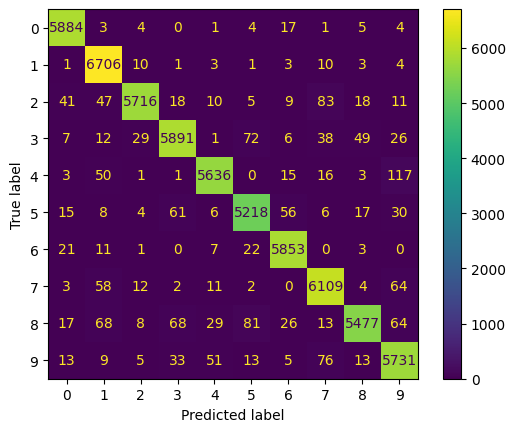

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

y_train_knn_pred = cross_val_predict(knn_grid_search.best_estimator_, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_knn_pred)
plt.show()

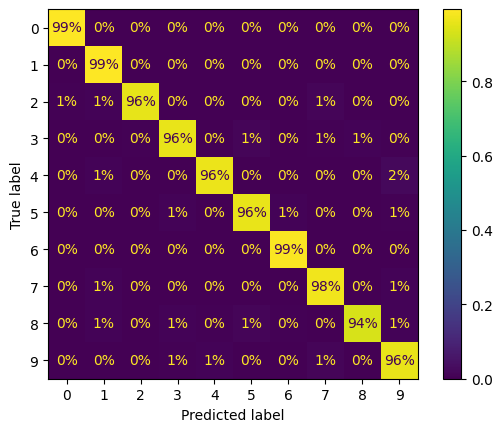

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_knn_pred, normalize="true", values_format=".0%")
plt.show()

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

ovr_sgd_clf = OneVsRestClassifier(SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))
ovr_sgd_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier(random_state=42))

In [12]:
from sklearn.model_selection import cross_val_score
ovr_sgd_f1_scores = cross_val_score(ovr_sgd_clf, X_train, y_train, cv=3, scoring="f1_macro")
ovr_sgd_f1_scores.mean()

0.867811573170024

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(ovr_sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8556 , 0.86845, 0.88235])

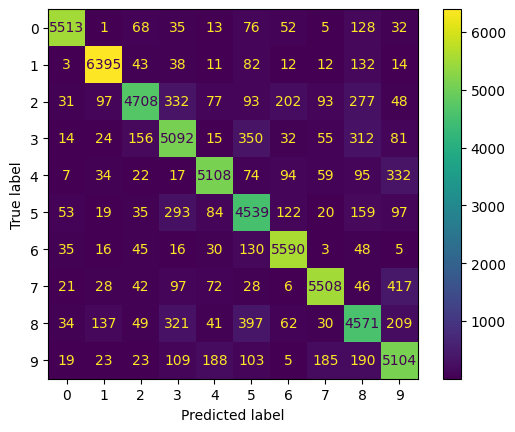

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

ovr_sgd_y_train_pred = cross_val_predict(ovr_sgd_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, ovr_sgd_y_train_pred)
plt.show()

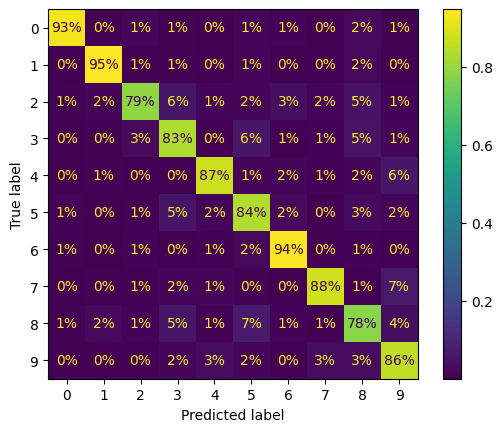

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, ovr_sgd_y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_sgd_clf = OneVsOneClassifier(SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))
ovo_sgd_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [ ]:
cross_val_score(ovo_sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.91545, 0.9131 , 0.92045])

In [ ]:
ovo_sgd_f1_scores = cross_val_score(ovo_sgd_clf, X_train, y_train, cv=3, scoring="f1_macro")

In [ ]:
ovo_sgd_f1_scores.mean()

0.9152398889316894

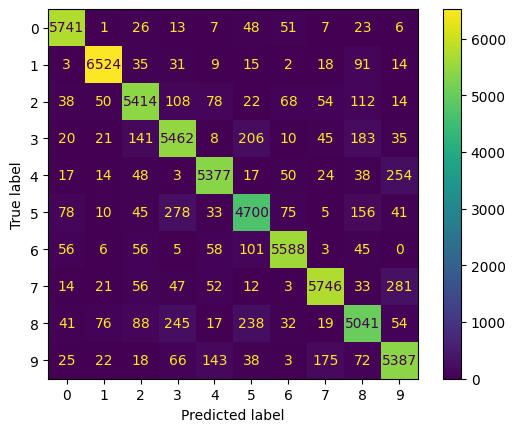

In [ ]:
ovo_sgd_y_train_pred = cross_val_predict(ovo_sgd_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, ovo_sgd_y_train_pred)
plt.show()

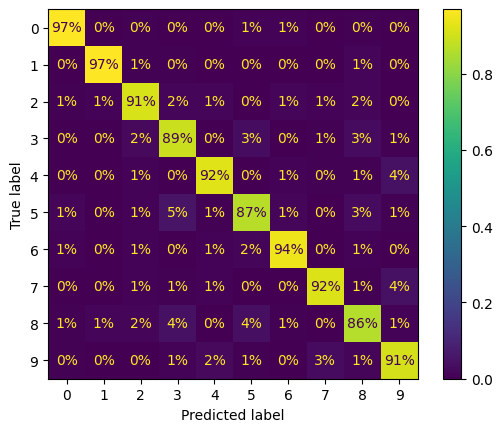

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, ovo_sgd_y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

In [ ]:
y_probas_forest[0]

array([0.  , 0.02, 0.02, 0.26, 0.  , 0.68, 0.  , 0.  , 0.01, 0.01])

In [ ]:
forest_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
import numpy as np
class_indices = np.argmax(y_probas_forest, axis=1)

In [ ]:
y_forest_pred = forest_clf.classes_[class_indices]

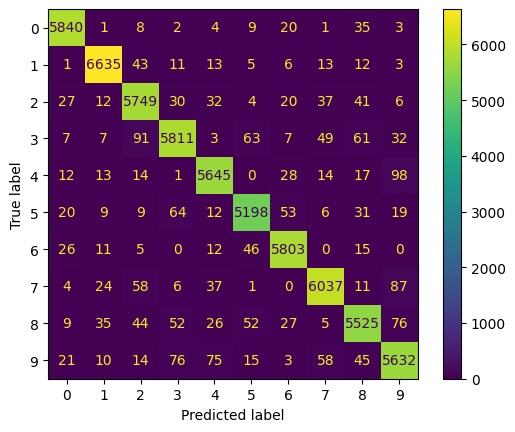

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_forest_pred)
plt.show()

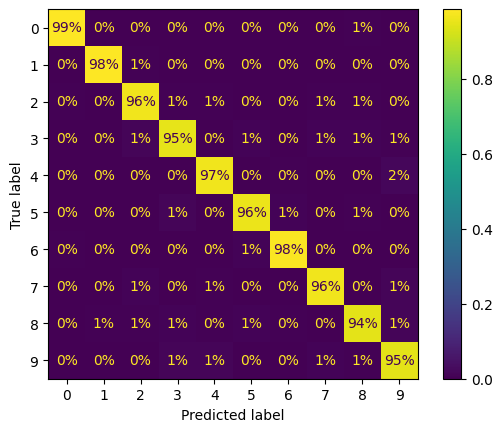

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_forest_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

In [ ]:
forest_f1_scores = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="f1_macro")

In [ ]:
forest_f1_scores.mean()

0.9642946688001679

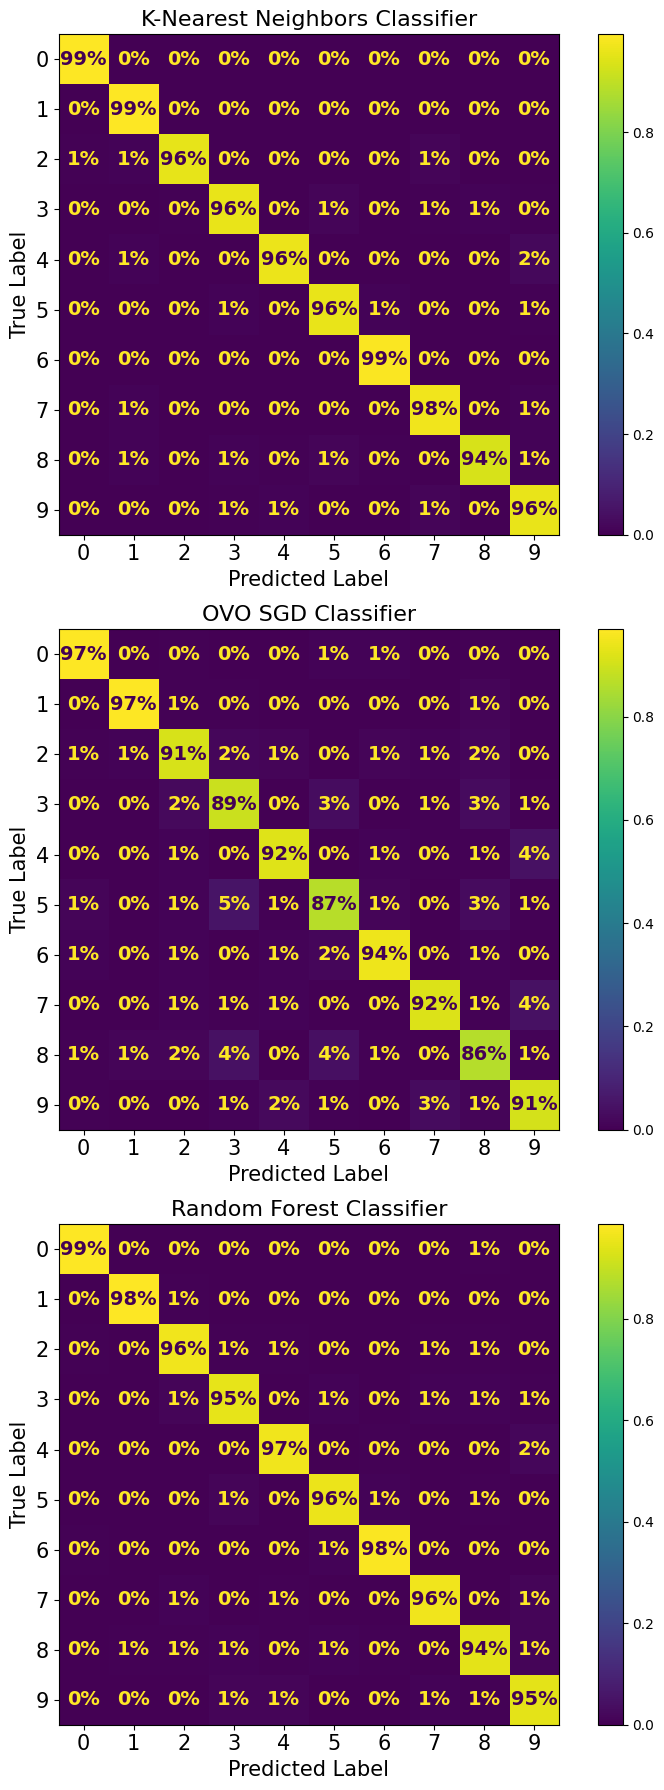

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(3, 1, figsize=(8, 18))

knn_cm = ConfusionMatrixDisplay.from_predictions(y_train, y_train_knn_pred, normalize="true", values_format=".0%", ax=axes[0])
axes[0].set_title("K-Nearest Neighbors Classifier", fontsize=16)
axes[0].set_xlabel('Predicted Label', fontsize=15)
axes[0].set_ylabel('True Label', fontsize=15)
axes[0].tick_params(axis='both', labelsize=15)

sgd_cm = ConfusionMatrixDisplay.from_predictions(y_train, ovo_sgd_y_train_pred, normalize="true", values_format=".0%", ax=axes[1])
axes[1].set_title("OVO SGD Classifier", fontsize=16)
axes[1].set_xlabel('Predicted Label', fontsize=15)
axes[1].set_ylabel('True Label', fontsize=15)
axes[1].tick_params(axis='both', labelsize=15)

rf_cm = ConfusionMatrixDisplay.from_predictions(y_train, y_forest_pred, normalize="true", values_format=".0%", ax=axes[2])
axes[2].set_title("Random Forest Classifier", fontsize=16)
axes[2].set_xlabel('Predicted Label', fontsize=15)
axes[2].set_ylabel('True Label', fontsize=15)
axes[2].tick_params(axis='both', labelsize=15)

for item in [knn_cm, sgd_cm, rf_cm]:
    for text in item.text_.ravel():
        text.set_fontsize(14)
        text.set_weight('bold')

plt.tight_layout()

plt.show()
